**Musical Instruments Review Analysis**

COMP262 - Group 3

In [123]:
import json
import pandas as pd
df = pd.read_json(r'Musical_Instruments_5.json',lines = True)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014"


1. reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
2. asin - ID of the product, e.g. 0000013714
3. reviewerName - name of the reviewer
4. helpful - helpfulness rating of the review, e.g. 2/3
5. reviewText - text of the review
6. overall - rating of the product
7. summary - summary of the review
8. unixReviewTime - time of the review (unix time)
9. reviewTime - time of the review (raw)

In [124]:
df.shape

(10261, 9)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [126]:
df.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [127]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [128]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [129]:
df.count()

reviewerID        10261
asin              10261
reviewerName      10234
helpful           10261
reviewText        10261
overall           10261
summary           10261
unixReviewTime    10261
reviewTime        10261
dtype: int64

In [130]:
df.overall.value_counts()

5    6938
4    2084
3     772
2     250
1     217
Name: overall, dtype: int64

In [131]:
df.reviewerID.value_counts()

ADH0O8UVJOT10     42
A15TYOEWBQYF0X    38
A1L7M2JXN4EZCR    38
A2EZWZ8MBEDOLN    36
A2NYK9KWFMJV4Y    34
                  ..
AU9RL6MBM25YY      5
A31997Q9ABEIE9     5
AASCUHX7YUC6M      5
AWQQ1QHCECDJ3      5
A3A7Y3TSPPZU9T     5
Name: reviewerID, Length: 1429, dtype: int64

In [132]:
df.asin.value_counts()

B003VWJ2K8    163
B0002E1G5C    143
B0002F7K7Y    116
B003VWKPHC    114
B0002H0A3S     93
             ... 
B004GYM7IE      5
B000LPUV8K      5
B000LAT0AK      5
B004HJ9COU      5
1384719342      5
Name: asin, Length: 900, dtype: int64

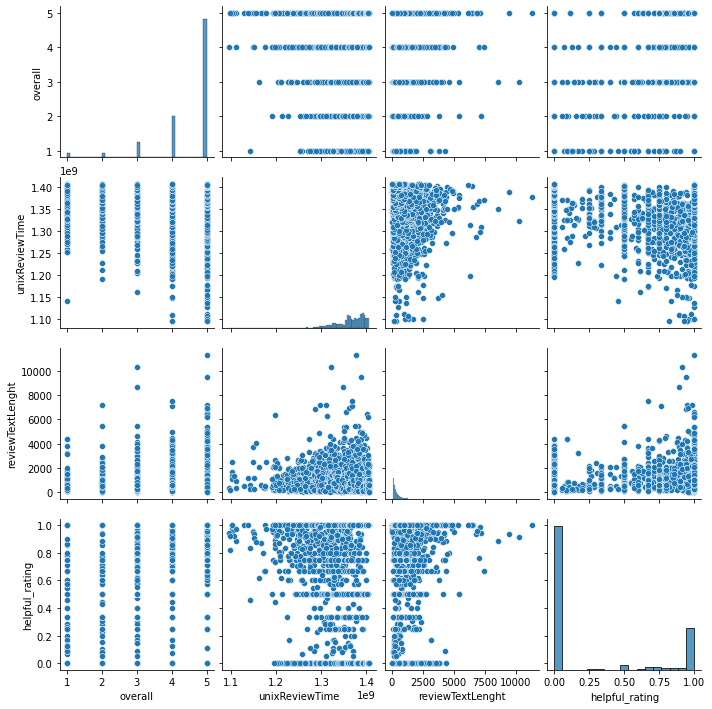

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

### Create syntetic lenght field
df['reviewTextLenght'] = df['reviewText'].apply(len)

### Create syntetic helpful rating field
def create_helpful_rating(value):
    if(value[1] > 0):
        return value[0]/value[1]
    return 0

df['helpful_rating'] = df['helpful'].apply(create_helpful_rating)


sns.pairplot(df)

In [134]:
ratings= df['overall'].value_counts().keys().tolist()
values = df['overall'].value_counts().tolist()
print(f'Rating   Distribution')
for i in range(len(ratings)):
    print(f'{ratings[i]}      {values[i]}')

Rating   Distribution
5      6938
4      2084
3      772
2      250
1      217


In [135]:
df['reviewTextLenght'] = df['reviewText'].apply(len)
#df.reviewTextLenght.value_counts(bins=10)
#df.reviewTextLenght.value_counts(normalize=True)
df.reviewTextLenght.value_counts()

117     54
147     53
111     53
113     52
128     51
        ..
2122     1
2178     1
1639     1
1117     1
1644     1
Name: reviewTextLenght, Length: 1727, dtype: int64

**Most review comments have relativily short lenght. There are a considerable number of very long comments (10% > 1000) that need further analysis**

In [136]:
df[df['reviewTextLenght'] > 1000]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewTextLenght,helpful_rating
10,A2NYK9KWFMJV4Y,B00004Y2UT,"Mike Tarrani ""Jazz Drummer""","[6, 6]","Monster makes a wide array of cables, includin...",5,One of the best instrument cables within the b...,1334793600,"04 19, 2012",1076,1.0
18,A2EZWZ8MBEDOLN,B000068NSX,Charlo,"[3, 3]",I've been using these cables for more than 4 m...,5,So far so good. Will revisit at the 6 month m...,1363564800,"03 18, 2013",1557,1.0
101,A2NYK9KWFMJV4Y,B000068NZG,"Mike Tarrani ""Jazz Drummer""","[0, 0]","First, the reasons why I awarded this five sta...",5,Solved a big issue for me,1372118400,"06 25, 2013",1084,0.0
172,A6FIAB28IS79,B00009W40D,Samuel Chell,"[4, 4]","As a freelancer, I occasionally work with a ba...",4,Good enough for professional use,1244332800,"06 7, 2009",1060,1.0
184,A2N4QZ92NBKJZZ,B0000AQRSR,Phaeton,"[0, 0]",4 stars instead of 5 only because this thing w...,4,Buy This!,1386374400,"12 7, 2013",1173,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10246,A29B4PAIOL7HYG,B00J4TBMVO,"N. Caruso ""gibsonjunkie""","[0, 0]",I had the opportunity to try a set of Elixir N...,5,Great sounding and playing strings!,1405728000,"07 19, 2014",2275,0.0
10250,A30J7WQV0ZNRXG,B00JBIVXGC,"D. Reinstein ""marindavid""","[0, 0]",I had used Elixer strings for several years on...,5,"Great On A Gibson, Too!",1404950400,"07 10, 2014",1003,0.0
10255,A1TSKKBNV38E8Y,B00JBIVXGC,"K. Harriger ""K.R. Harriger""","[0, 0]",I have lots of friends who play these strings....,3,"Hmmm.... I like them, but with a lot of reserv...",1403654400,"06 25, 2014",2346,0.0
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",3027,0.0


<AxesSubplot:>

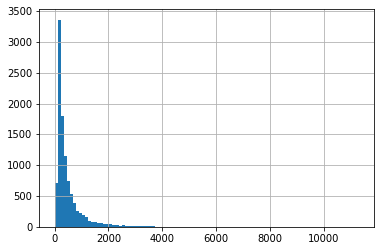

In [137]:
df.reviewTextLenght.hist(bins = 100)

In [138]:
df.reviewTextLenght.describe()

count    10261.000000
mean       485.929052
std        613.436113
min          0.000000
25%        162.000000
50%        284.000000
75%        552.000000
max      11310.000000
Name: reviewTextLenght, dtype: float64

In [139]:
sample = df.iloc[10]
sample['reviewText']

"Monster makes a wide array of cables, including some that are very high end. I initially purchased a pair ofMonster Rock Instrument Cable - 21 Feet - Angled to Straight 1/4-Inch plugto use with my keyboards, but when it came time to purchase cables for my bass and guitar I thought I'd pinch a few pennies.  I am so glad I did.I compared this cable model to the more expensive models I previously purchased and, aside from looks, could not detect any difference in sound. I Swapped back and forth between my guitars and keyboards, ensuring that each model was used on each instrument - still no difference.What the more expensive model has going for it is looks. I am not sure it (the higher priced model) is even more sturdy because the molded stress relief ends on this model seem to make it more reliable than its pricier sibling.Bottom line: carefully compare both cables using your own instrument and amp - if possible - before making a purchase decision. You may find, as I did, that higher pr

In [140]:
another_sample = df.iloc[10257]
another_sample['reviewText']

'I\'ve been thinking about trying the Nanoweb strings for a while, but I was a bit put off by the high price (they cost about twice as much as the uncharted strings I\'ve been buying)  and the comments of some reviewers that the tone of coated strings is noticeably duller. I was intrigued by the promise of long life, though; I have a Taylor Big Baby that I bought used, and which came with a set of Nanowebs that had probably been on it for a year- and they didn\'t sound at all like old strings. This review set gave me a chance to finally see for myself how they sound when new.I\'d just changed the strings on my 1970s Gibson Gospel a week ago, so I decided that would be my reference. The Nanowebs went on my 1970s Guild D-35. Both are well broken in, solid spruce top guitars. The Gospel is a bit brighter sounding, but I\'m pretty familiar with the sound of both guitars. If they D-35 sounded dull, I\'d notice.As I was unwrapping the Nanowebs I noticed that while they were labeled "Light" g

In [141]:
df[df['reviewTextLenght']>11000]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewTextLenght,helpful_rating
6576,A20JJ8634DG3FS,B001I8ITQA,"Johnny Guitar ""J.F. Guitar""","[10, 10]","COMPARISONS: I have compared, side by side, th...",5,a GREAT choice for a univibe pedal,1377043200,"08 21, 2013",11310,1.0


In [142]:
largest_sample = df.iloc[6576]
largest_sample['reviewText']

'COMPARISONS: I have compared, side by side, the following pedals:Fulltone mini deja vibe ($200), Dunlop Univibe (discontinued stainless steel model)($220), Dunlop Roto-vibe ($180), Voodoo Labs Micro Vibe ($150), BBE Soul Bender ($129) as well as comparing to some "different beasts" in the modulation family - an MXR phase 90, MXR EVH flanger, Boss chorus, Behringer Vibrato, and Behringer Time Machine.SUMMARY - just the factsA great pedal and my favorite uni-vibe of all. Doesn\'t take a lot of space up, standard power supply, good visibility on control knob settings. Does not add or subtract frequencies to the signal or add noise. This is the only pedal in the univibe group I can say that about and it\'s why it\'s almost certainly going to be the one I keep. Might have slightly less ability to produce as thick of a univibe effect as some of the others -- still need to play with it a little more. Overall I LOVE this pedal at under 60 bucks. Only downsides I see are the LED does not flash

In [143]:
#Distribution of most helpful comments
df[df['helpful_rating'] >= 0.70].describe()

,overall,unixReviewTime,reviewTextLenght,helpful_rating
count,2502.000000,2.502000e+03,2502.000000,2502.000000
mean,4.498002,1.338650e+09,796.956435,0.971197
std,0.865504,4.756590e+07,930.985109,0.070004
min,1.000000,1.095466e+09,0.000000,0.700000
25%,4.000000,1.314598e+09,252.000000,1.000000
50%,5.000000,1.348618e+09,487.000000,1.000000
75%,5.000000,1.374710e+09,997.250000,1.000000
max,5.000000,1.405123e+09,11310.000000,1.000000


In [144]:
#Reviews without text
print(df[df['reviewTextLenght'] == 0].describe())
print(df[df['reviewTextLenght'] == 0])

        overall  unixReviewTime  reviewTextLenght  helpful_rating
count  7.000000    7.000000e+00               7.0        7.000000
mean   4.857143    1.341261e+09               0.0        0.981059
std    0.377964    4.424145e+07               0.0        0.020117
min    4.000000    1.258416e+09               0.0        0.952381
25%    5.000000    1.331035e+09               0.0        0.965327
50%    5.000000    1.342656e+09               0.0        0.984375
75%    5.000000    1.368792e+09               0.0        1.000000
max    5.000000    1.388102e+09               0.0        1.000000
          reviewerID        asin            reviewerName     helpful  \
2927   AF7AQHLX1UV1Z  B0002H0H4A           Smoothbassman  [101, 105]   
4401   AU3GYRAKBUAEU  B000CD1R7K              Jon Norris  [189, 192]   
8739  A3N93PUHEMQU34  B004OU2IQG    L. Su "Flying train"      [3, 3]   
9175   AMEZJVXMSEPY0  B005FKF1PY                 M. Luke      [1, 1]   
9306  A3ABAA36CZVYNX  B005M0TKL8              